In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set_style("whitegrid")
sns.set(font_scale=3)
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
simulation_a = pd.read_csv("../TP5/data/simulation_a.csv")
simulation_b = pd.read_csv("../TP5/data/simulation_b.csv")

In [3]:
simulation_a.head(), simulation_b.head()

(   exit_n   time  run
 0       0  0.250    0
 1       1  1.250    0
 2       2  1.875    0
 3       3  2.925    0
 4       4  3.050    0,
      N    d  run  exit_n   time
 0  200  1.2    0       0  1.375
 1  200  1.2    0       1  2.500
 2  200  1.2    0       2  2.900
 3  200  1.2    0       3  3.575
 4  200  1.2    0       4  3.650)

In [4]:
simulation_a.shape, simulation_b.shape

((200000, 3), (116000, 5))

In [5]:
simulation_a['exit_n'] = simulation_a['exit_n'] + 1
simulation_a.head()

,exit_n,time,run
0,1,0.250,0
1,2,1.250,0
2,3,1.875,0
3,4,2.925,0
4,5,3.050,0


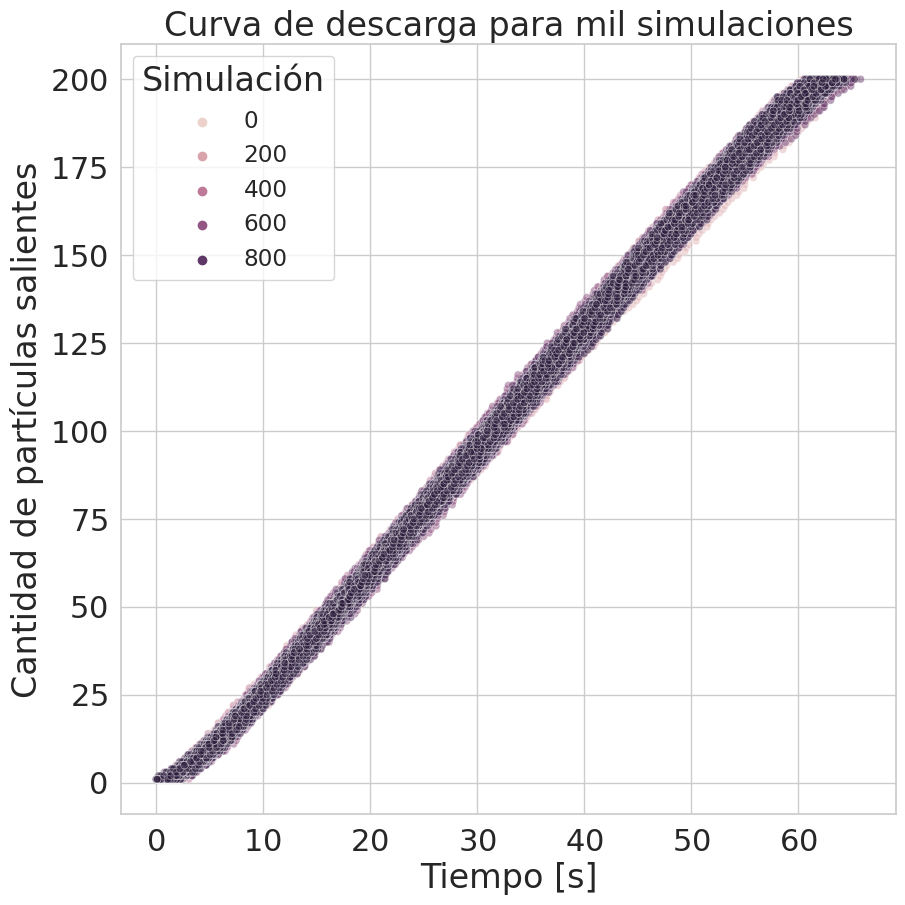

In [6]:
sns.set_palette(sns.color_palette("viridis"))
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

# Crear el gráfico de línea acumulativo con Seaborn
ax = sns.scatterplot(data=simulation_a, x='time', y='exit_n', hue='run', marker='o', s=30, alpha=0.5)

# Formato de notación científica para el eje y
ax.ticklabel_format(style='sci', useMathText=True)

# Personalizar el gráfico
plt.xlabel('Tiempo [s]')
plt.ylabel('Cantidad de partículas salientes')
plt.title('Curva de descarga para mil simulaciones')
plt.legend(title='Simulación', fontsize='x-small')

# plt.xlim(2, 10)  # Ajusta los límites según lo necesario

# Mostrar el gráfico
plt.show()


In [7]:
# Promediar los valores de time por exit_n
mean_simulation_a = simulation_a.groupby('exit_n')['time'].mean().reset_index()

# Agregar las columnas de min_time y max_time
mean_simulation_a['min_time'] = simulation_a.groupby('exit_n')['time'].min().values
mean_simulation_a['max_time'] = simulation_a.groupby('exit_n')['time'].max().values

mean_simulation_a

,exit_n,time,min_time,max_time
0,1,1.076775,0.050,3.100
1,2,1.739425,0.275,3.425
2,3,2.285100,0.800,3.875
3,4,2.752675,1.475,4.200
4,5,3.211550,1.900,4.725
...,...,...,...,...
195,196,60.767775,58.525,63.725
196,197,61.241625,59.025,64.275
197,198,61.691850,59.350,64.900
198,199,62.155375,59.900,64.950


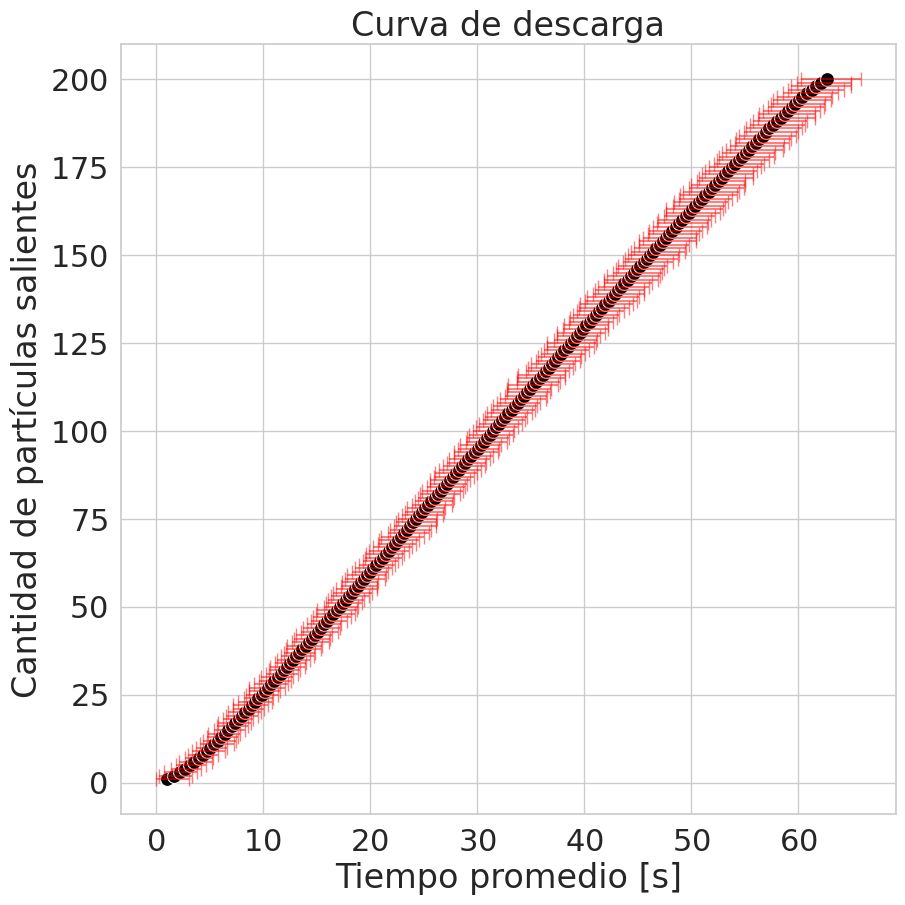

In [8]:
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

sns.set_palette(sns.color_palette("viridis"))

# Crear el scatterplot con barras de error
plt.errorbar(mean_simulation_a['time'], mean_simulation_a['exit_n'], xerr=[mean_simulation_a['time'] - mean_simulation_a['min_time'], mean_simulation_a['max_time'] - mean_simulation_a['time']], fmt='none', capsize=5, color='red', alpha=0.5)
ax = sns.scatterplot(data=mean_simulation_a, y='exit_n', x='time', marker='o', s=100, alpha=1, color='black')


# Formato de notación científica para el eje y
ax.ticklabel_format(style='sci', useMathText=True)

# Etiquetas y título del gráfico
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Curva de descarga')

# Mostrar el gráfico
plt.show()


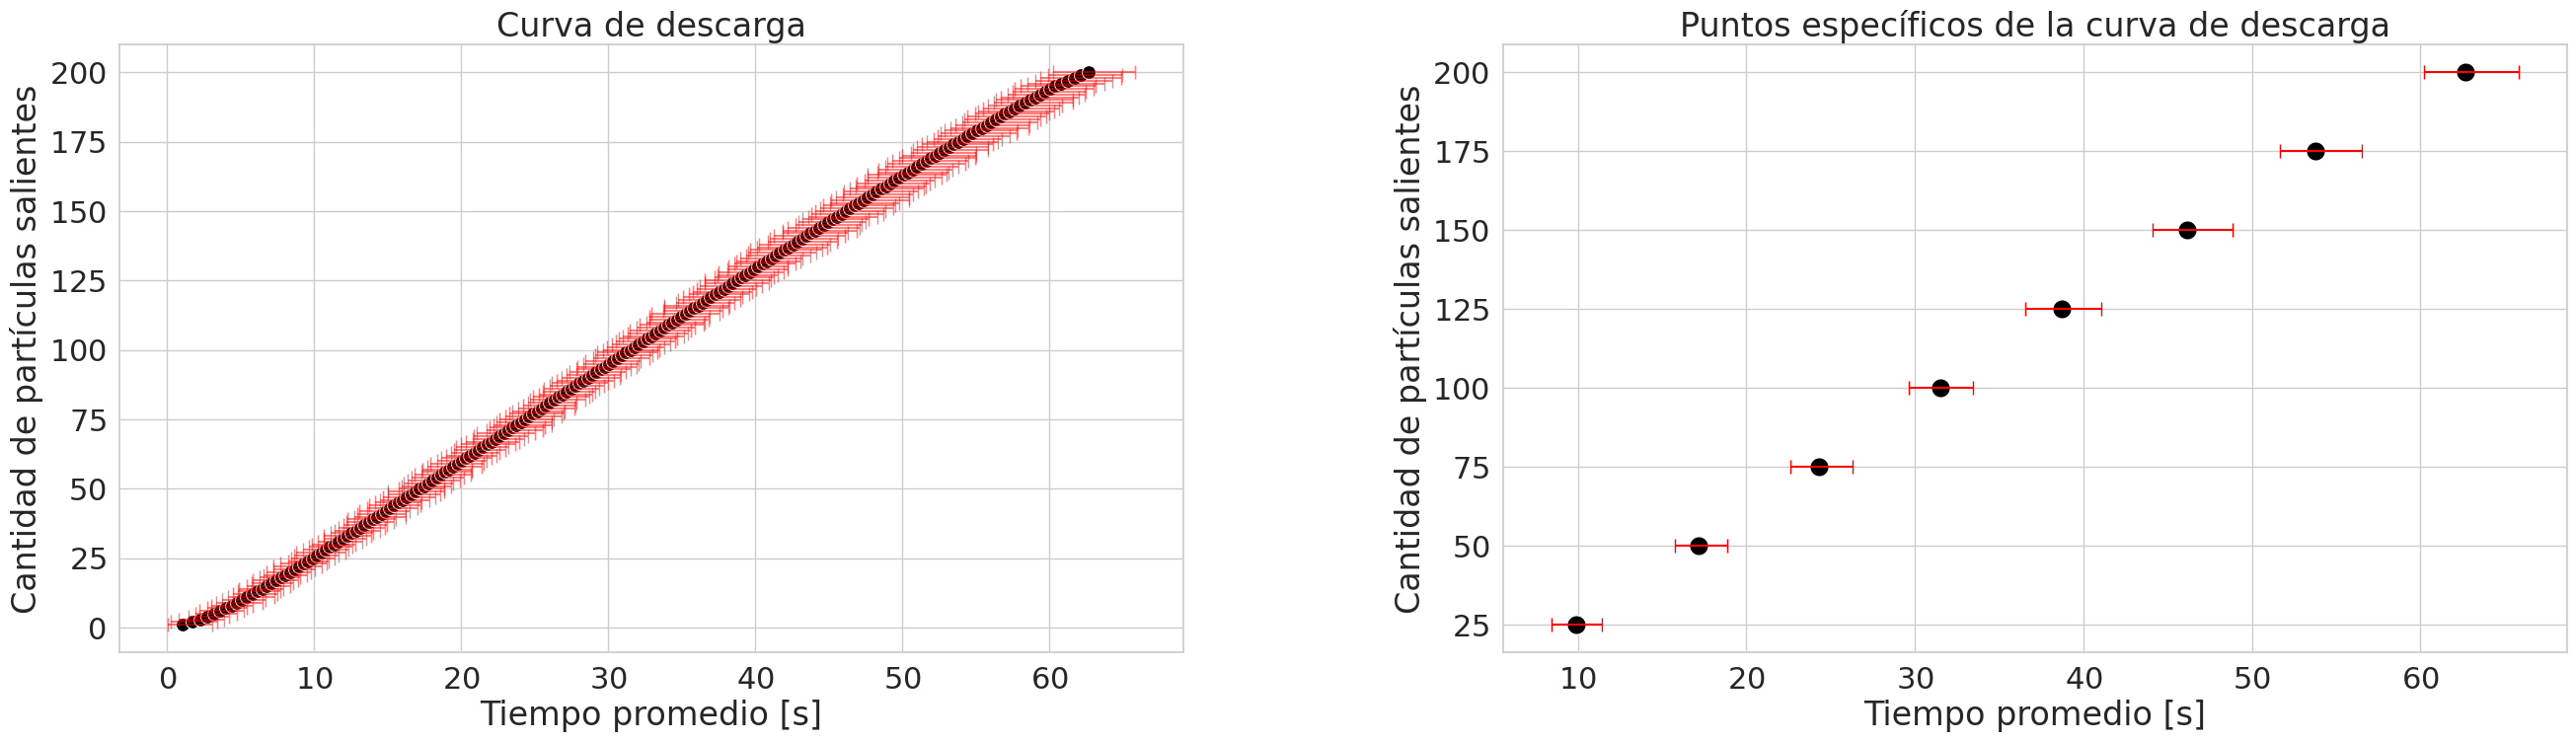

In [9]:
from matplotlib.gridspec import GridSpec

# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)
sns.set_palette(sns.color_palette("viridis"))

# Crear la figura y la especificación de la cuadrícula
fig = plt.figure(figsize=(32, 8))
grid = GridSpec(1, 2, width_ratios=[3, 3])

# Gráfico existente
ax1 = fig.add_subplot(grid[0])
plt.errorbar(mean_simulation_a['time'], mean_simulation_a['exit_n'], xerr=[mean_simulation_a['time'] - mean_simulation_a['min_time'], mean_simulation_a['max_time'] - mean_simulation_a['time']], fmt='none', capsize=5, color='red', alpha=0.5)
sns.scatterplot(data=mean_simulation_a, y='exit_n', x='time', marker='o', s=100, alpha=1, color='black')
ax1.ticklabel_format(style='sci', useMathText=True)
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Curva de descarga')

# Nuevo gráfico al lado
ax2 = fig.add_subplot(grid[1])
exit_n_values = [25, 50, 75, 100, 125, 150, 175, 200]
filtered_data = mean_simulation_a[mean_simulation_a['exit_n'].isin(exit_n_values)]
sns.scatterplot(data=filtered_data, y='exit_n', x='time', marker='o', s=200, alpha=1, color='black')
plt.errorbar(filtered_data['time'], filtered_data['exit_n'], xerr=[filtered_data['time'] - filtered_data['min_time'], filtered_data['max_time'] - filtered_data['time']], fmt='none', capsize=5, color='red', alpha=1)
ax2.ticklabel_format(style='sci', useMathText=True)
plt.ylabel('Cantidad de partículas salientes')
plt.xlabel('Tiempo promedio [s]')
plt.title('Puntos específicos de la curva de descarga')

# Ajustar la disposición de los subgráficos
grid.update(wspace=0.3)
# plt.tight_layout(hspace=0.5)

# Mostrar el gráfico
plt.show()


In [10]:
simulation_a.head()

,exit_n,time,run
0,1,0.250,0
1,2,1.250,0
2,3,1.875,0
3,4,2.925,0
4,5,3.050,0


In [ ]:
# Crear una lista para almacenar los DataFrames
lista_dataframes = []

# Obtener los valores únicos de 'run'
corridas = simulation_a['run'].unique()

# Iterar sobre cada corrida y crear un DataFrame separado
for corrida in corridas:
    # Filtrar el DataFrame original por la corrida actual
    df_corrida = simulation_a[simulation_a['run'] == corrida].copy()
    # Agregar el DataFrame de la corrida a la lista
    df_corrida.drop('run', axis=1, inplace=True)
    lista_dataframes.append(df_corrida)
    
lista_dataframes

In [38]:
df_mean_a = pd.DataFrame({'seconds': list(range(71)), 'exit_n': 0})

for second in df_mean_a['seconds']:
    for df in lista_dataframes:
        for time in df['time'].astype(int):
            if time == second:
                df_mean_a.loc[df_mean_a['seconds'] == time, 'exit_n'] += 1
df_mean_a['exit_n'] = df_mean_a['exit_n'] / len(lista_dataframes)  
df_mean_a

,seconds,exit_n
0,0,0.504
1,1,1.517
2,2,2.066
3,3,2.415
4,4,2.650
...,...,...
66,66,0.000
67,67,0.000
68,68,0.000
69,69,0.000


Text(0.5, 1.0, 'Caudal promedio en función del ancho de la puerta')

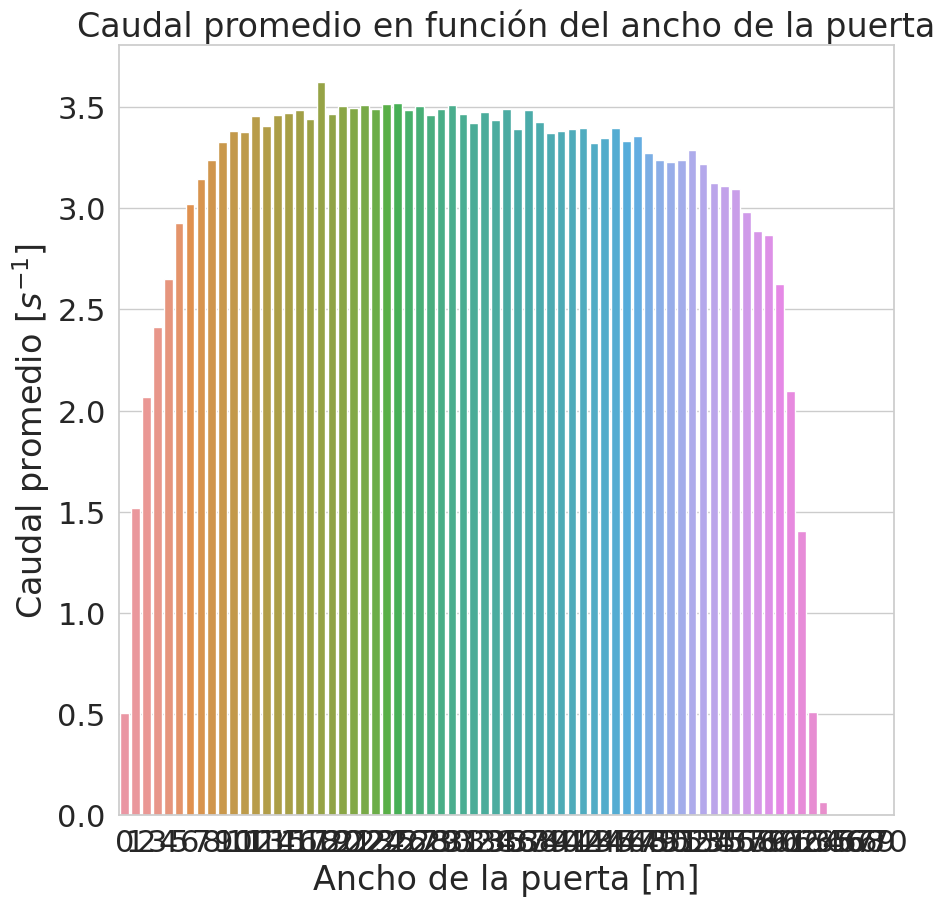

In [42]:
# Establecer el estilo y tamaño de fuente
sns.set(style="whitegrid", font_scale=2)

sns.barplot(data=df_mean_a, y="exit_n", x='seconds')

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [$s^{-1}$]')
plt.title('Caudal promedio en función del ancho de la puerta')

In [41]:
mean_simulation_a

,exit_n,time,min_time,max_time
0,1,1.076775,0.050,3.100
1,2,1.739425,0.275,3.425
2,3,2.285100,0.800,3.875
3,4,2.752675,1.475,4.200
4,5,3.211550,1.900,4.725
...,...,...,...,...
195,196,60.767775,58.525,63.725
196,197,61.241625,59.025,64.275
197,198,61.691850,59.350,64.900
198,199,62.155375,59.900,64.950


In [ ]:
simulation_b.head(), simulation_b.shape

In [ ]:
simulation_b["exit_n"] = simulation_b["exit_n"] + 1 
simulation_b

In [ ]:
# Promediar los valores de time por exit_n
mean_simulation_b = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].mean().reset_index()

# Agregar las columnas de min_time y max_time
mean_simulation_b['min_time'] = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].min().values
mean_simulation_b['max_time'] = simulation_b.groupby(['N', 'd', 'exit_n'])['time'].max().values

mean_simulation_b

In [ ]:
# Calcular el delta de la cantidad de partículas salientes y el delta de tiempo (dt)
mean_simulation_b.at[1090, 'time'] = 42.200
mean_simulation_b['delta_exit_n'] = mean_simulation_b['exit_n'].diff()
mean_simulation_b['dt'] = mean_simulation_b['time'].diff().replace(0, 0.0001)

# Calcular el caudal (Q)
mean_simulation_b['Q'] = mean_simulation_b['delta_exit_n'] / mean_simulation_b['dt']
mean_simulation_b['Q_variation'] = mean_simulation_b['Q'].pct_change()
mean_simulation_b

In [ ]:
# Encontrar los rangos de tiempos donde el caudal se mantiene constante
constant_Q_ranges = []
current_range_start = None

for index, row in mean_simulation_b.iterrows():
    if current_range_start is None:
        current_range_start = row['time']
    elif abs(row['Q_variation']) < 1e-3:  # Variación relativa mínima para considerar constante
        if current_range_start != row['time']:
            constant_Q_ranges.append((current_range_start, row['time']))
        current_range_start = None

# Crear la columna "is_stationary" e inicializarla como False
mean_simulation_b['is_stationary'] = False
        
# Imprimir los rangos de tiempos donde el caudal se mantiene constante
# Marcar las filas correspondientes a los rangos de tiempo donde el caudal es constante
for start, end in constant_Q_ranges:
    print(f"Caudal constante en el rango de tiempo [{start:.4f}, {end:.4f}]")
    mean_simulation_b.loc[(mean_simulation_b['time'] >= start) & (mean_simulation_b['time'] <= end), 'is_stationary'] = True

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
    
mean_simulation_b

In [ ]:
q_sum_d_3 = mean_simulation_b[mean_simulation_b['d'] == 3.0]['Q'].sum()
print("Suma de la columna Q para d=3.0:", q_sum_d_3)

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='d', y='Q', data=mean_simulation_b, color='black', errcolor='red')

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [1/s]')
plt.title('Caudal promedio en función del ancho de la puerta')

# Mostrar el gráfico
plt.show()

In [ ]:
# Ajustar los datos para que el caudal sea siempre positivo
adjusted_data = np.maximum(mean_simulation_b['Q'], 0)

# Crear el boxplot utilizando Seaborn
sns.boxplot(x='d', y=adjusted_data, data=mean_simulation_b)

# Agregar la regresión lineal a los valores medios
sns.regplot(x='d', y='Q', data=mean_simulation_b.groupby('d')['Q'].mean().reset_index(), scatter=True)

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [$s^{-1}$]')
plt.title('Caudal promedio en función del ancho de la puerta')

# plt.ylim(-1, 25)

# Mostrar el gráfico
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='d', y='Q', data=mean_simulation_b, color='black', errcolor='red')

# Calcular los coeficientes de regresión para cada categoría y trazar las líneas de regresión
sns.regplot(x='d', y='Q', data=mean_simulation_b, scatter=False, color='blue')

# Configurar las etiquetas del gráfico
plt.xlabel('Ancho de la puerta [m]')
plt.ylabel('Caudal promedio [1/s]')
plt.title('Caudal promedio en función del ancho de la puerta con regresión lineal')

# Mostrar el gráfico

plt.show()